## tensorflow 实现线性回归

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import time
import random
import os

for module in tf, keras, pd, mpl, np, sklearn:
    print(module.__name__, module.__version__)

tensorflow 2.3.0
tensorflow.keras 2.4.0
pandas 1.3.3
matplotlib 3.4.2
numpy 1.18.5
sklearn 1.0


### 1. 生成数据集

In [76]:
# 定义数据的维度
feature_num = 3
# 定义数据行数
input_num = 100000

# 使用正态分布
feature = tf.random.normal(shape=(input_num, feature_num), stddev=2)

# 定义权重和偏置值
true_w = [1.2, -2.2, 3.]
true_b = 4.2

# 生成 labels
labels = true_w[0] * feature[:, 0] + true_w[1] * feature[:, 1] + true_w[2] * feature[:, 2] + true_b
# 添加噪声
labels += tf.random.normal(labels.shape, stddev=0.02)
print(feature.shape, labels.shape)
print(feature[:5].numpy(), "\n", labels[:5].numpy())

(100000, 3) (100000,)
[[-0.4573848  -0.24052252  0.28499278]
 [ 2.3372414   1.8433998  -2.7990808 ]
 [-1.9701186  -0.71144474 -2.0567284 ]
 [ 0.37455434  1.6320381  -2.0464053 ]
 [ 2.6805234  -1.7598087  -3.25024   ]] 
 [ 5.0652113 -5.4506936 -2.7771137 -5.0748844  1.5556948]


### 2. 读取数据

- dataset.shuffle :
    1. shuffle 可以将数据打乱
    2. shuffle 的 buffer_size 参数应大于等于样本数，batch 可以指定 batch_size 的分割大小。

In [77]:
# 将数据转换为数据集
dataset = tf.data.Dataset.from_tensor_slices((feature, labels))


In [79]:

# 打印小批量的数据
# shuffle 的 buffer_size 参数应大于等于样本数，batch 可以指定 batch_size 的分割大小。
dataset = dataset.shuffle(buffer_size=input_num)
# 读取小批次的数据
dataset_batch = dataset.batch(50)
for (feature, label) in dataset_batch.take(1):
    print(feature, "\n", label)

tf.Tensor(
[[-2.0731328   0.45335817 -0.2230632 ]
 [ 0.01766138 -1.0745347   2.57225   ]
 [-0.8087329  -0.3923255   1.2199194 ]
 [-2.020036    1.5488789  -2.9775813 ]
 [-2.0922365   0.61310333  2.2902415 ]
 [ 0.24842104 -0.5126224   4.045801  ]
 [-0.7175059  -0.72007686 -2.8621533 ]
 [ 0.2706135  -1.3632289   3.6006536 ]
 [-3.6211195   0.51390684 -1.5201361 ]
 [ 0.00689193  0.7139775  -2.216607  ]], shape=(10, 3), dtype=float32) 
 tf.Tensor(
[  0.04056982  14.332015     7.725486   -10.569067     7.1755033
  17.767971    -3.691156    18.33568     -5.8462806   -3.9896238 ], shape=(10,), dtype=float32)


### 3. 画图展示数据

In [87]:
# 获取数据
feature = np.asarray([feature for (feature, label) in dataset])
label = np.asarray([label for (feature, label) in dataset])

print(feature.shape, label.shape)
print(feature.shape, label.shape)

(100000, 3) (100000,)


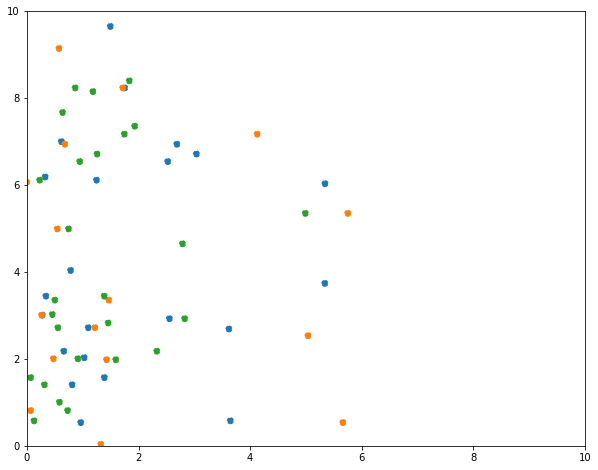

In [92]:

# 绘制画版
plt.figure(figsize=(10, 8))

# 设置 xy轴范围
plt.scatter(feature[:100, 0], label[:100], linestyle='--', linewidth=1.0)
plt.scatter(feature[:100, 1], label[:100], linestyle='--', linewidth=1.0)
plt.scatter(feature[:100, 2], label[:100], linestyle='--', linewidth=1.0)
plt.gca().set_xlim(0, 10)
plt.gca().set_ylim(0, 10)
plt.show()

### 4. 使用keras搭建模型

In [93]:
print(type(feature), type(label))
print(feature.shape, label.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(100000, 3) (100000,)


In [94]:
# 创建模型
model = keras.models.Sequential()
# 添加层次
model.add(keras.layers.Dense(32, activation="relu", input_shape=feature.shape))
model.add(keras.layers.Dense(32, activation="relu", input_shape=feature.shape))
model.add(keras.layers.Dense(32, activation="relu", input_shape=feature.shape))
model.add(keras.layers.Dense(1))
model.compile(loss="mean_squared_error", optimizer="sgd" , metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100000, 32)        128       
_________________________________________________________________
dense_13 (Dense)             (None, 100000, 32)        1056      
_________________________________________________________________
dense_14 (Dense)             (None, 100000, 32)        1056      
_________________________________________________________________
dense_15 (Dense)             (None, 100000, 1)         33        
Total params: 2,273
Trainable params: 2,273
Non-trainable params: 0
_________________________________________________________________


In [95]:
history = model.fit(feature, label, epochs = 30, validation_split=0.1)

Epoch 1/30
2813/2813 [==============================] - 4s 2ms/step - loss: 60.9446 - accuracy: 0.0000e+00 - val_loss: 61.3392 - val_accuracy: 0.0000e+00
Epoch 2/30
2813/2813 [==============================] - 2s 869us/step - loss: 60.7827 - accuracy: 0.0000e+00 - val_loss: 61.0312 - val_accuracy: 0.0000e+00

### 5. 绘制损失函数图像

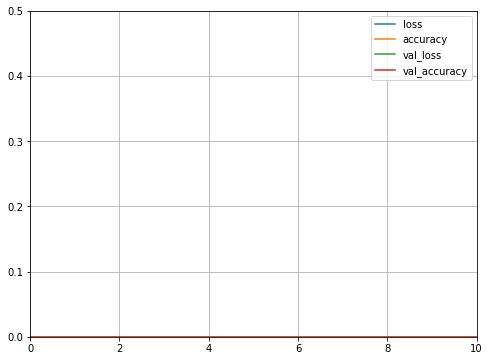

In [97]:
def plot_metric(history):
    pd.DataFrame(history.history).plot(figsize=(8,6))
    plt.gca().set_ylim(0, 0.5)
    plt.gca().set_xlim(0, 10)
    plt.grid(True)
    plt.show()

plot_metric(history)